In [41]:
import pandas as pd
import pymysql
from sqlalchemy import create_engine
import numpy as np
from dotenv import load_dotenv
import os

## Adatok lematiz√°l√°sa √©s adatb√°zisba ment√©se

In [42]:
load_dotenv()
DATABASE_URL = os.getenv("DATABASE_URL")
engine = create_engine(DATABASE_URL)

df = pd.read_sql("SELECT * FROM articles WHERE lemmatized_text is NULL ", con=engine)


In [43]:
from bs4 import BeautifulSoup

df['summary'] = df['summary'].apply(lambda x: BeautifulSoup(str(x), 'html.parser').get_text())

In [44]:
df['text'] = df['title'] + ' ' + df['summary']

In [45]:
df

id                                              title  \
0    30273  Hatalmasat zuhant a magyar bankok nyeres√©ge: m...   
1    30274  Palkovics L√°szl√≥: hamarosan elfogadhatja a kor...   
2    30275    J√≥ hangulatban v√°rj√°k a t≈ëzsd√©k a nap esem√©ny√©t   
3    30276               Nagy forgalommal emelkedik a Richter   
4    30277  ‚ÄûEgy igazi rosszfi√∫‚Äù ‚Äì V√©gre kider√ºlt, mit gon...   
..     ...                                                ...   
141  30414  Hopp√°: gy≈±r≈±t vett a Tankcsapda dobosa, k√∂zele...   
142  30415  K≈ëszeg l√°tnival√≥i ‚Äì Egy var√°zslatos v√°ros, aho...   
143  30416  Szir√©n√°z√≥ rend≈ëraut√≥k lept√©k el Katalin √©s Vil...   
144  30417  Ezek a vil√°g legszebb strandjai 2025-ben ‚Äì Az ...   
145  30418  T√∂megkarambol b√©n√≠totta meg az M0-st, roncsok ...   

                                               summary lemmatized_text  \
0    Els≈ë r√°n√©z√©sre felt≈±n≈ëen rosszul muzsik√°lt a m...            None   
1    A 2020-ban elfogadott mesters√©ges intelligenci...            None   
2    Vegyes ir√°nyok √©s m√©rs√©kelt elmozdul√°sok jelle...            None   
3    Az eur√≥pai t≈ëzsd√©ken enyh√©n pozit√≠v a hangulat...            None   
4    A The New York Times besz√°molt r√≥la, hogy k√∂ze...            None   
..                                                 ...             ...   
141      Fejes Tam√°s 130 ezret fizetett a gy√∂ny√∂r≈±√©rt.            None   
142  K≈ëszeg l√°tnival√≥i k√∂z√∂tt a k√∂z√©pkori v√°r, a ha...            None   
143                       Az elk√∂vet≈ët hamar elfogt√°k.            None   
144  Id√©n a vil√°g legszebb strandja Eur√≥p√°ban van ‚Äì...            None   
145              H√°rom szem√©lyaut√≥ √ºtk√∂z√∂tt egym√°snak.            None   

                                                  link           category  \
0    https://www.portfolio.hu/bank/20250605/hatalma...               Bank   
1    https://www.portfolio.hu/gazdasag/20250605/pal...           Gazdas√°g   
2    https://www.portfolio.hu/uzlet/20250605/jo-han...              √úzlet   
3    https://www.portfolio.hu/uzlet/20250605/nagy-f...              √úzlet   
4    https://www.portfolio.hu/global/20250605/egy-i...             Glob√°l   
..                                                 ...                ...   
141  https://www.borsonline.hu/magyar-sztarhirek/20...  magyar-sztarhirek   
142  https://www.borsonline.hu/belfoldi-utazas/2025...    belfoldi-utazas   
143  https://www.borsonline.hu/kiralyi-csalad/2025/...     kiralyi-csalad   
144  https://www.borsonline.hu/kulfoldi-utazas/2025...    kulfoldi-utazas   
145  https://www.borsonline.hu/kek-hirek/2025/06/ut...          kek-hirek   

    predicted_category           published  \
0                 None 2025-06-05 11:12:00   
1                 None 2025-06-05 11:01:00   
2                 None 2025-06-05 11:00:00   
3                 None 2025-06-05 11:00:00   
4                 None 2025-06-05 10:53:00   
..                 ...                 ...   
141               None 2025-06-05 10:20:00   
142               None 2025-06-05 10:15:00   
143               None 2025-06-05 10:00:00   
144               None 2025-06-05 09:45:00   
145               None 2025-06-05 09:38:53   

                                                  text  
0    Hatalmasat zuhant a magyar bankok nyeres√©ge: m...  
1    Palkovics L√°szl√≥: hamarosan elfogadhatja a kor...  
2    J√≥ hangulatban v√°rj√°k a t≈ëzsd√©k a nap esem√©ny√©...  
3    Nagy forgalommal emelkedik a Richter Az eur√≥pa...  
4    ‚ÄûEgy igazi rosszfi√∫‚Äù ‚Äì V√©gre kider√ºlt, mit gon...  
..                                                 ...  
141  Hopp√°: gy≈±r≈±t vett a Tankcsapda dobosa, k√∂zele...  
142  K≈ëszeg l√°tnival√≥i ‚Äì Egy var√°zslatos v√°ros, aho...  
143  Szir√©n√°z√≥ rend≈ëraut√≥k lept√©k el Katalin √©s Vil...  
144  Ezek a vil√°g legszebb strandjai 2025-ben ‚Äì Az ...  
145  T√∂megkarambol b√©n√≠totta meg az M0-st, roncsok ...  

[146 rows x 9 columns]

In [46]:
import huspacy
import spacy

huspacy.download()
nlp = spacy.load("hu_core_news_lg")

['C:\\Users\\KomPhone\\projects\\ml\\cubix_ml_vizsga\\.venv\\Scripts\\python.exe', '-m', 'pip', 'install', 'hu_core_news_lg @ https://huggingface.co/huspacy/hu_core_news_lg/resolve/v3.8.0/hu_core_news_lg-any-py3-none-any.whl']


In [47]:
def lemmatize(text):
    doc = nlp(text.lower())
    return ' '.join(
        token.lemma_ for token in doc
        if not token.is_stop and not token.is_punct and token.is_alpha
    )

df['lemmatized_text'] = df['text'].apply(lemmatize)


In [48]:
from sqlalchemy.orm import Session
from app.db.database import SessionLocal
import app.models as models

db: Session = SessionLocal()

articles_to_update = (
    db.query(models.Articles)
    .filter(models.Articles.lemmatized_text.is_(None))
    .all()
)

lemmatized_map = dict(zip(df['link'], df['lemmatized_text']))

for article in articles_to_update:
    if article.link in lemmatized_map:
        article.lemmatized_text = lemmatized_map[article.link]

db.commit()
db.close()

## Kategori√°k el≈ëk√©sz√≠t√©se

In [77]:
df = pd.read_sql("SELECT * FROM articles", con=engine)

In [78]:
df

id                                              title  \
0          1                           Satuba fogt√°k a forintot   
1          2  Visszadobta Zelenszkij az orosz b√©kefelt√©telek...   
2          3  Nyilatkozott a b√©ket√°rgyal√°sokr√≥l Oroszorsz√°g ...   
3          4  S√≠nre tett√©k von der Leyen √∫jabb sz√°zmilli√°rdo...   
4          5  Itt a friss el≈ërejelz√©s: id√©n alig n√∂vekedhet ...   
...      ...                                                ...   
30498  30499  F√ºggetlenk√©nt 1990-ben az SZDSZ-frakci√≥ba √ºlt ...   
30499  30500  Megl√°tta az eszm√©letlen embert a buszmeg√°ll√≥ba...   
30500  30501  Br√ºsszel beismerte, hogy Magyarorsz√°gnak igaza...   
30501  30502  Sokkol√≥ MI-vide√≥ kering az X-en a lengyel eln√∂...   
30502  30503  A Vez√∫v titka: mesters√©ges intelligencia nyitj...   

                                                 summary  \
0      H√©tf≈ën egy enyhe er≈ës√∂d√©ssel z√°rt a forint, b√°...   
1      Tegnap b√©ket√°rgyal√°st folytatott Oroszorsz√°g √©...   
2      Telegram fi√≥kj√°n nyilatkozott a tegnapi, siker...   
3      J√≥ √∫ton haladnak afel√©, hogy m√©g az √©v v√©ge el...   
4      Az OECD friss el≈ërejelz√©se szerint a magyar ga...   
...                                                  ...   
30498  Vil√°gh√°bor√∫s frontharcos, a nyilasok vez√©rkari...   
30499           Az eszm√©letlen ember k√©s≈ëbb meg is halt.   
30500                            Itt vannak a r√©szletek!   
30501                                          Mutatjuk!   
30502  √âvsz√°zadokon √°t n√©ma titkokat ≈ëriztek az elsze...   

                                         lemmatized_text  \
0      satu fog forint h√©tf≈ë enyhe er≈ës√∂d√©s z√°r forin...   
1      visszadob zelenszkij orosz b√©kefelt√©tel botr√°n...   
2      nyilatkozik b√©ket√°rgyal√°s oroszorsz√°g er≈ës emb...   
3      s√≠n tesz von der ley sz√°zmilli√°rdos keleti √ºgy...   
4      friss el≈ërejelz√©s id√©n alig n√∂vekedhet magyar ...   
...                                                  ...   
30498  f√ºggetl √ºl parlament k√©s≈ën orb√°n viktor katona...   
30499  megl√°t eszm√©letlen ember buszmeg√°ll√≥ els≈ë gond...   
30500            br√ºsz beismer magyarorsz√°g igaz r√©szlet   
30501        sokkol√≥ kering lengyel eln√∂kv√°laszt√°s mutat   
30502  vez√∫v titok mesters√©ges intelligencia nyit √≥ko...   

                                                    link         category  \
0      https://www.portfolio.hu/deviza/20250603/satub...           Deviza   
1      https://www.portfolio.hu/global/20250603/vissz...           Glob√°l   
2      https://www.portfolio.hu/global/20250603/nyila...           Glob√°l   
3      https://www.portfolio.hu/unios-forrasok/202506...   Uni√≥s forr√°sok   
4      https://www.portfolio.hu/gazdasag/20250603/itt...         Gazdas√°g   
...                                                  ...              ...   
30498  https://nepszava.hu/3281727_kiraly-bela-monogr...        Visszhang   
30499  https://magyarnemzet.hu/belfold/2025/06/meglat...          belf√∂ld   
30500  https://magyarnemzet.hu/kulfold/2025/06/brussz...  alap√©rtelmezett   
30501  https://magyarnemzet.hu/kulfold/2025/06/elnokv...  alap√©rtelmezett   
30502  https://magyarnemzet.hu/tudomany/2025/06/a-vez...  alap√©rtelmezett   

      predicted_category           published  
0                   None 2025-06-03 08:30:00  
1                   None 2025-06-03 08:25:00  
2                   None 2025-06-03 08:25:00  
3                   None 2025-06-03 08:22:00  
4                   None 2025-06-03 08:09:00  
...                  ...                 ...  
30498               None 2025-06-05 12:14:00  
30499               None 2025-06-05 12:23:21  
30500               None 2025-06-05 12:20:46  
30501               None 2025-06-05 12:09:44  
30502               None 2025-06-05 12:08:08  

[30503 rows x 8 columns]

In [79]:
df.drop([
    "id",
    "predicted_category",
    "published",
    "link"
], axis=1, inplace=True)

In [80]:
import unicodedata

def remove_accents(text):
    if isinstance(text, str):
        nfkd_form = unicodedata.normalize('NFKD', text)
        return ''.join([c for c in nfkd_form if not unicodedata.combining(c)]).lower()
    return text

df['category'] = df['category'].apply(remove_accents)

In [81]:
df.dropna(inplace=True)

### Kategori√°k √∂sszevon√°sa

In [82]:
df['category'] = df['category'].replace({
    'global': 'kulfold',
    'hirtvkulfold': 'kulfold',
    'kulpol': 'kulfold',
    'nagyvilag': 'kulfold',
    'vilag': 'kulfold',
    'celeb': 'bulvar',
    'sztarok': 'bulvar',
    'sztarvilag': 'bulvar',
    'kultur': 'kultura',
    'teve': 'bulvar',
    'techtud': 'tudomany',
    'techbazis': 'tudomany',
    'tech-tudomany': 'tudomany',
    'tech': 'tudomany',
    'itthon': 'belfold',
    'belpol': 'belfold',
    'politika': 'belfold',
    'nemzetkozi-gazdasag': 'gazdasag',
    'uzlet': 'gazdasag',
    'penz': 'gazdasag',
    'bank': 'gazdasag',
    'befektetes': 'gazdasag',
    'deviza': 'gazdasag',
    'vilaggazdasag-magyar-gazdasag': 'gazdasag',
    'elet-stilus': 'eletmod',
    'ferfiaknak': 'eletmod',
    'test-es-lelek': 'eletmod',
    'bunugyek': 'baleset-bunugy',
    'futball': 'sport',
    'foci': 'sport',
    'szorakozas': 'bulvar',
})

### Kategori√°k elt√°vol√≠t√°sa
√ârtelmetlen val√≥s inform√°ci√≥t nem tartalmaz√≥ kategori√°k let√°vol√≠t√°sa

In [83]:
df = df[~df['category'].isin(['2023', 'hirek', 'hirado', 'aktualis', 'mindekozben'])]

Kategori√°k sz≈±r√©se

In [84]:
category_counts = df['category'].value_counts()

valid_categories = category_counts[category_counts >= 300].index

df = df[df['category'].isin(valid_categories)]


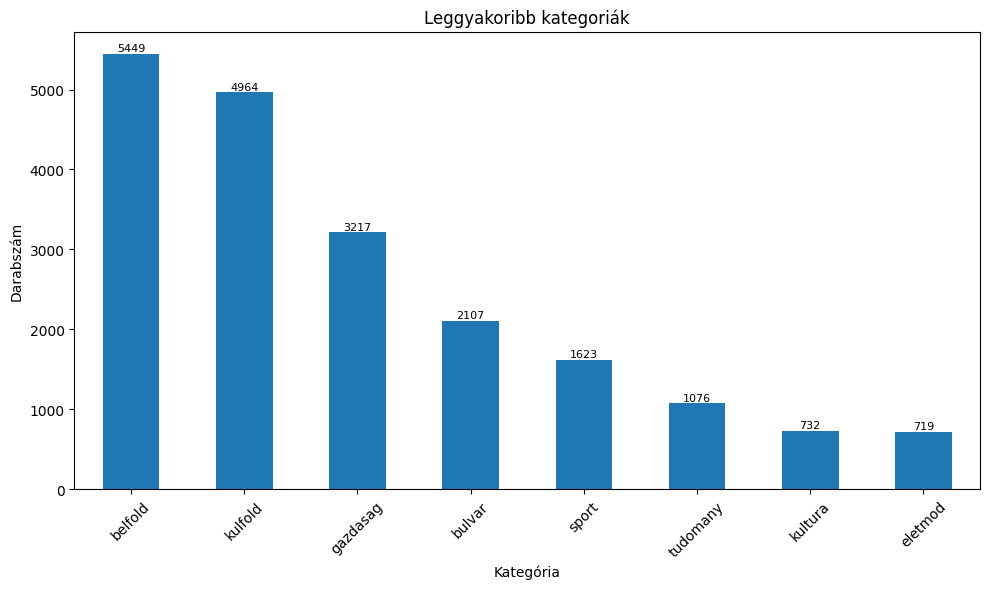

In [85]:
import matplotlib.pyplot as plt

top_categories = df['category'].value_counts().nlargest(20)

plt.figure(figsize=(10, 6))
ax = top_categories.plot(kind='bar')

plt.title('Leggyakoribb kategori√°k')
plt.xlabel('Kateg√≥ria')
plt.ylabel('Darabsz√°m')
plt.xticks(rotation=45)
plt.tight_layout()

for i, value in enumerate(top_categories.values):
    ax.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=8)

plt.show()

In [86]:
df

title  \
0                               Satuba fogt√°k a forintot   
1      Visszadobta Zelenszkij az orosz b√©kefelt√©telek...   
2      Nyilatkozott a b√©ket√°rgyal√°sokr√≥l Oroszorsz√°g ...   
4      Itt a friss el≈ërejelz√©s: id√©n alig n√∂vekedhet ...   
5      Megnevezt√©k az oroszok a bomb√°z√≥flott√°t megb√©n...   
...                                                  ...   
30490  Film k√©sz√ºlhet az OpenAI dr√°m√°j√°r√≥l, amikor ki...   
30491  Itt az EKB legfrissebb kamatd√∂nt√©se, √©rkeznek ...   
30493  Az √≠rek r√°tal√°ltak a megold√°sra, a nevet≈ëg√°z m...   
30496  Ukrajna csatlakoz√°sa a gazdagabb nyugat-eur√≥pa...   
30499  Megl√°tta az eszm√©letlen embert a buszmeg√°ll√≥ba...   

                                                 summary  \
0      H√©tf≈ën egy enyhe er≈ës√∂d√©ssel z√°rt a forint, b√°...   
1      Tegnap b√©ket√°rgyal√°st folytatott Oroszorsz√°g √©...   
2      Telegram fi√≥kj√°n nyilatkozott a tegnapi, siker...   
4      Az OECD friss el≈ërejelz√©se szerint a magyar ga...   
5      Egy Artyom Timofejev nev≈± ukr√°n f√©rfit gyan√∫s√≠...   
...                                                  ...   
30490  Neves rendez≈ëvel √©s sz√≠n√©szekkel k√©sz√≠thet fil...   
30491                                   Cikk√ºnk friss√ºl.   
30493  Egy √≠r k√≥rh√°z radik√°lis l√©p√©st tett a fenntart...   
30496  K√ºl√∂n√∂sen √©rz√©kenyen √©rintheti ez majd a mez≈ëg...   
30499           Az eszm√©letlen ember k√©s≈ëbb meg is halt.   

                                         lemmatized_text  category  
0      satu fog forint h√©tf≈ë enyhe er≈ës√∂d√©s z√°r forin...  gazdasag  
1      visszadob zelenszkij orosz b√©kefelt√©tel botr√°n...   kulfold  
2      nyilatkozik b√©ket√°rgyal√°s oroszorsz√°g er≈ës emb...   kulfold  
4      friss el≈ërejelz√©s id√©n alig n√∂vekedhet magyar ...  gazdasag  
5      megnevez orosz bomb√°z√≥flotta megb√©n√≠t√≥ t√°mad√°s...   kulfold  
...                                                  ...       ...  
30490  film k√©sz√ºlhet openai dr√°ma kir√∫g p√°r nap viss...  tudomany  
30491  ekb friss kamatd√∂nt√©s √©rkezik r√©szlet cikk fri...  gazdasag  
30493  √≠r r√°tal√°l megold√°s nevet≈ëg√°z menti plan√©ta √≠r...  gazdasag  
30496  ukrajna csatlakoz√°s gazdag orsz√°g gazdas√°gi √©r...   kulfold  
30499  megl√°t eszm√©letlen ember buszmeg√°ll√≥ els≈ë gond...   belfold  

[19887 rows x 4 columns]

## Kategoria predikci√≥ XGBoost-tel

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
df['combined'] = df['summary'] + ' ' + df['lemmatized_text']
X = vectorizer.fit_transform(df['combined'])

In [60]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['category'])


In [61]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(y)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y)
weight_dict = dict(zip(classes, class_weights))

# Minden sorhoz hozz√°rendelj√ºk a megfelel≈ë s√∫lyt
sample_weights = np.array([weight_dict[label] for label in y])


In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X, y, sample_weights, test_size=0.2, stratify=y, random_state=42
)


In [63]:
import optuna
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

def objective(trial):
    params = {
        'objective': 'multi:softmax',
        'num_class': len(np.unique(y_train)),
        'eval_metric': 'mlogloss',
        'n_jobs': -1,
        'verbosity': 0,
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 4, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        'gamma': trial.suggest_int('gamma', 0, 10)
    }

    model = XGBClassifier(**params)
    model.fit(X_train, y_train, sample_weight=w_train)

    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred, average='macro')


In [64]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)  # 10


[I 2025-06-05 13:18:48,918] A new study created in memory with name: no-name-5f54fb0a-a67d-455f-b96d-1a03567553ba
[I 2025-06-05 13:19:29,297] Trial 0 finished with value: 0.6691419302389633 and parameters: {'n_estimators': 470, 'max_depth': 5, 'learning_rate': 0.2229857374666386, 'subsample': 0.8409858393217391, 'colsample_bytree': 0.894378413140179, 'gamma': 6}. Best is trial 0 with value: 0.6691419302389633.
[I 2025-06-05 13:20:03,259] Trial 1 finished with value: 0.6571100513786537 and parameters: {'n_estimators': 395, 'max_depth': 9, 'learning_rate': 0.17836583239624695, 'subsample': 0.9749818990470858, 'colsample_bytree': 0.9349671503180793, 'gamma': 9}. Best is trial 0 with value: 0.6691419302389633.
[I 2025-06-05 13:21:36,068] Trial 2 finished with value: 0.6890114747345218 and parameters: {'n_estimators': 486, 'max_depth': 5, 'learning_rate': 0.0562536435009605, 'subsample': 0.9782403384529921, 'colsample_bytree': 0.9234679338663868, 'gamma': 0}. Best is trial 2 with value: 0.6

In [65]:
# study.stop()

In [66]:
print("Best trial:")
print("  Value (macro F1):", study.best_value)
print("  Params:", study.best_params)

Best trial:
  Value (macro F1): 0.6911132531636626
  Params: {'n_estimators': 301, 'max_depth': 9, 'learning_rate': 0.24033105011399966, 'subsample': 0.8219754756042266, 'colsample_bytree': 0.9863041453317289, 'gamma': 3}


In [67]:
best_model = XGBClassifier(
    **study.best_params,
    objective='multi:softmax',
    num_class=len(np.unique(y_train)),
    eval_metric='mlogloss',
    n_jobs=-1
)

best_model.fit(X_train, y_train, sample_weight=w_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9863041453317289, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, feature_weights=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.24033105011399966,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=301, n_jobs=-1, num_class=8, ...)

In [68]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

     belfold       0.72      0.71      0.71      1086
      bulvar       0.73      0.77      0.75       422
     eletmod       0.59      0.62      0.60       143
    gazdasag       0.71      0.71      0.71       640
     kulfold       0.80      0.74      0.77       991
     kultura       0.52      0.61      0.56       146
       sport       0.88      0.86      0.87       324
    tudomany       0.49      0.62      0.55       215

    accuracy                           0.72      3967
   macro avg       0.68      0.70      0.69      3967
weighted avg       0.73      0.72      0.73      3967



In [69]:
import joblib
joblib.dump(best_model, "xgboost_best_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(le, "label_encoder.pkl")


['label_encoder.pkl']

In [70]:
def predict_category(text: str) -> str:
    text_clean = (lemmatize(text)).lower()
    X = vectorizer.transform([text_clean])
    pred = best_model.predict(X)
    return le.inverse_transform(pred)[0]


In [71]:
predict_category('A n≈ëi energia aktiv√°l√°sa! 4 gyakorlat, hogy √∫jra kapcsol√≥dj a feminin √©nedhez')

'sport'

## Kateg√≥ria predikci√≥ Neur√°lis h√°l√≥val-val

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout


vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X = vectorizer.fit_transform(df['combined'])

le = LabelEncoder()
y = le.fit_transform(df['category'])
y_cat = to_categorical(y)

# 3. Tan√≠t√≥ √©s teszt halmaz
X_train, X_temp, y_train, y_temp = train_test_split(X, y_cat, stratify=y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# 4. S√∫lyoz√°s a kiegyens√∫lyozatlan oszt√°lyokhoz
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
weight_dict = dict(enumerate(class_weights))

# 5. Neur√°lis h√°l√≥ modell
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(y_cat.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# 6. Tan√≠t√°s
model.fit(
    X_train.toarray(), y_train,
    validation_data=(X_val.toarray(), y_val),
    epochs=10,
    batch_size=64,
    class_weight=weight_dict,
    callbacks=[early_stop]
)

# 7. √ârt√©kel√©s
loss, acc = model.evaluate(X_test.toarray(), y_test)
print(f"Pontoss√°g: {acc:.3f}")


üìÇ Fold 1/5
‚úÖ Fold 1 pontoss√°g: 0.743

üìÇ Fold 2/5
‚úÖ Fold 2 pontoss√°g: 0.749

üìÇ Fold 3/5
‚úÖ Fold 3 pontoss√°g: 0.741

üìÇ Fold 4/5
‚úÖ Fold 4 pontoss√°g: 0.738

üìÇ Fold 5/5
‚úÖ Fold 5 pontoss√°g: 0.749

üîö √Åtlagos pontoss√°g: 0.744
üìä Sz√≥r√°s: 0.004


In [73]:
import pickle
model.save("models/category_predicter.keras")

# 2. A TF-IDF vectorizer ment√©se
with open("models/vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

with open("models/label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)


## Tesztel√©s

In [74]:
from tensorflow.keras.models import load_model

model = load_model("models/category_predicter.keras")

with open("models/vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)
with open("models/label_encoder.pkl", "rb") as f:
    le = pickle.load(f)


In [75]:
tester = pd.read_sql("SELECT * FROM articles WHERE lemmatized_text is NULL ", con=engine)

In [76]:
tester["text"] = tester["title"].fillna("") + " " + tester["summary"].fillna("")
tester['lemmatized_text'] = tester['text'].apply(lemmatize)

tester["combined"] = tester["text"] + " " + tester['lemmatized_text']
X_new = vectorizer.transform(tester["combined"])

ValueError: Found array with 0 sample(s) (shape=(0, 10000)) while a minimum of 1 is required by TfidfTransformer.

In [39]:
y_pred = model.predict(X_new.toarray())
y_labels = np.argmax(y_pred, axis=1)
tester["predicted_category"] = le.inverse_transform(y_labels)

1/1 [==============================] - 0s 42ms/step


In [40]:
tester

id                                              title  \
0   30254  Nem cs√∂kken a fenyeget√©s: 60 ezer embert sz√≥l√≠...   
1   30255  Friss kutat√°sb√≥l der√ºl ki, hogy √°llnak a magya...   
2   30256  Nagyobb vesz√©lyben vannak a r√°kos beteg f√©rfia...   
3   30257  √öjabb nyolc Apple term√©kkel szak√≠t a YouTube, ...   
4   30258  Ad√≥srabszolgas√°g vesz√©ly√©re figyelmeztette az ...   
5   30259  Marco Rossi √≥ri√°si kock√°zatot v√°llalt, ha nem ...   
6   30260  Visszat√©r Magyarorsz√°gra az elektronikus zene ...   
7   30261                    Sopronban indul a boldogs√°g √©ve   
8   30262  A rom√°nok id√°ig jutottak: most m√°r Magyarorsz√°...   
9   30263  Menek√ºlnek a Wizz Air befektet≈ëi, √©rt√©ke negye...   
10  30264  Hungarian law conflating homosexuals with pedo...   
11  30265  Magyar√°zza a bizony√≠tv√°ny√°t a kamu Clint Eastw...   
12  30266  Bet√∂rtek az ukr√°nok az egyik legnagyobb orosz ...   
13  30267  Trump v√©delmi minisztere olyan NATO-kiad√°sn√∂ve...   
14  30268  Az energia√°tmenetre m√°r k√©tszer annyit k√∂lt a ...   
15  30269  D√∂bbenet, ami kider√ºlt: m√°snaposan ment be dol...   
16  30270  Orb√°n Viktor: Az orosz-ukr√°n h√°bor√∫ lett az a ...   
17  30271  Gy√°sz: tragikus aut√≥baleset t√∂rt√©nt, elhunyt e...   
18  30272  Elfogytak a szavak: holtan tal√°lt√°k a n√©pszer≈±...   

                                              summary  \
0   Boris Pistorius n√©met v√©delmi miniszter cs√ºt√∂r...   
1   A magyar lakoss√°g legink√°bb a meg√∫jul√≥ energia...   
2   Az Y-kromosz√≥ma elveszt√©se cs√∂kkenti gy√≥gyul√°s...   
3   Nem csak iPhone-ok, hanem iPadek √©s m√©g egy iP...   
4   √ögy l√°tja, ha √≠gy folytat√≥dik ‚Äûcsak a kamatfiz...   
5   A magyar v√°logatott t√∂rt√©net√©ben √∫j fejezetet ...   
6                                                       
7   J√∫nius 1-j√©n nyitotta meg kapuit a SopronFest,...   
8                     A t√©nyek azonban m√°st mutatnak.   
9   Jelentett a l√©git√°ras√°g, megindult a r√©szv√©nye...   
10  A total of 15 governments have now joined the ...   
11  Nagyon hasonl√≥an v√©dekezett, mint kor√°bban a k...   
12  √ñsszesen t√∂bb gigab√°jtnyi adatot loptak el ukr...   
13  Pete Hegseth szerint a h√≥nap v√©g√©ig d√∂nt√©s sz√º...   
14  Az olaj√°rak cs√∂kken√©se visszafogta a kiad√°soka...   
15                       Ezen most sokan meglep≈ëdnek.   
16         M√°ra ‚Äûoda a Nyugat legend√°s √©letmin≈ës√©ge".   
17  A gyermek √©desapj√°nak √°llapota tov√°bbra is kri...   
18                 Az edz≈ëterme visszavon√°sig bez√°rt.   

                                      lemmatized_text  \
0   cs√∂kken fenyeget√©s ezer ember sz√≥l√≠t fegyver n...   
1   friss kutat√°s der√ºl √°ll magyar meg√∫jul√≥ energi...   
2   vesz√©ly r√°kos beteg f√©rfi gondol elveszt√©s cs√∂...   
3   nyolc apple term√©k szak√≠t youtube csup√°n megol...   
4   ad√≥srabszolgas√°g vesz√©ly figyelmeztet egyes√ºlt...   
5   marco rossi √≥ri√°si kock√°zat v√°llal j√∂n d√∂nt√©s ...   
6   visszat√©r magyarorsz√°g elektronikus zene franc...   
7   sopron indul boldogs√°g √©v j√∫nius nyit kapu sop...   
8   rom√°n id√°ig jut magyarorsz√°g okol parajdi kata...   
9   menek√ºl wizz air befektet≈ëi √©rt√©k negyed vesz√≠...   
10  hungarian law conflating homosexuals with pedo...   
11  magyar√°z bizony√≠tv√°ny kamu clint gy√°rt√≥ √∫js√°g√≠...   
12  bet√∂r ukr√°n nagy orosz katonai rep√ºl≈ëg√©pgy√°r r...   
13  trump v√©delmi miniszter helyez kil√°t√°s orb√°n t...   
14  energia√°tmenet k√©t annyi k√∂lt vil√°g id√©n fossz...   
15  d√∂bbenet kider√ºl m√°snapos megy dolgozik tilla ...   
16  orb√°n viktor h√°bor√∫ kataliz√°tor amely hivatkoz...   
17  gy√°sz tragikus aut√≥baleset t√∂rt√©nik elhuny n√©g...   
18  elfogy sz√≥ holt tal√°l n√©pszer≈± fitneszedz≈ë gye...   

                                                 link             category  \
0   https://www.portfolio.hu/global/20250605/nem-c...               Glob√°l   
1   https://www.portfolio.hu/uzlet/20250605/friss-...                √úzlet   